<a href="https://colab.research.google.com/github/dhyannn/AML/blob/main/rough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [22]:
df=pd.read_csv('/content/mental_health.csv')
df.head()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes
1,30-Above,Male,Others,31-60 days,Yes,Yes,Maybe,No,No,High,No,No,Yes
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,No,Medium,Yes,Maybe,No
3,25-30,Male,Others,1-14 days,Yes,No,Maybe,No,Maybe,Medium,No,Maybe,Yes
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,No


In [23]:
missing_values = df.isnull().sum()
print(missing_values)

Age                        0
Gender                     0
Occupation                 0
Days_Indoors               0
Growing_Stress             0
Quarantine_Frustrations    0
Changes_Habits             0
Mental_Health_History      0
Weight_Change              0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
dtype: int64


In [24]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

columns_to_encode = ['Gender', 'Occupation', 'Days_Indoors', 'Growing_Stress', 'Quarantine_Frustrations', 'Mood_Swings', 'Social_Weakness',
                     'Changes_Habits', 'Mental_Health_History', 'Weight_Change', 'Coping_Struggles', 'Work_Interest']

# Create a label encoder instance
label_encoder = LabelEncoder()

# Create a dictionary to store the mapping of labels to numeric values
label_mapping = {}

# Apply label encoding to each selected column and store the mapping
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])
    label_mapping[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Display the label mapping
for column, mapping in label_mapping.items():
    print(f"{column} Label Mapping:")
    for label, numeric_value in mapping.items():
        print(f"  {label}: {numeric_value}")

Gender Label Mapping:
  Female: 0
  Male: 1
Occupation Label Mapping:
  Business: 0
  Corporate: 1
  Housewife: 2
  Others: 3
  Student: 4
Days_Indoors Label Mapping:
  1-14 days: 0
  15-30 days: 1
  31-60 days: 2
  Go out Every day: 3
  More than 2 months: 4
Growing_Stress Label Mapping:
  Maybe: 0
  No: 1
  Yes: 2
Quarantine_Frustrations Label Mapping:
  Maybe: 0
  No: 1
  Yes: 2
Mood_Swings Label Mapping:
  High: 0
  Low: 1
  Medium: 2
Social_Weakness Label Mapping:
  Maybe: 0
  No: 1
  Yes: 2
Changes_Habits Label Mapping:
  Maybe: 0
  No: 1
  Yes: 2
Mental_Health_History Label Mapping:
  Maybe: 0
  No: 1
  Yes: 2
Weight_Change Label Mapping:
  Maybe: 0
  No: 1
  Yes: 2
Coping_Struggles Label Mapping:
  No: 0
  Yes: 1
Work_Interest Label Mapping:
  Maybe: 0
  No: 1
  Yes: 2


<Axes: ylabel='Days_Indoors'>

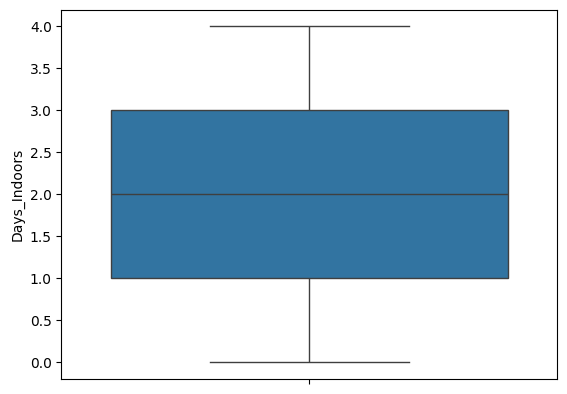

In [25]:

sns.boxplot(df['Days_Indoors'])


In [26]:
df.head()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,0,1,0,2,2,1,2,2,2,0,1,2
1,30-Above,1,3,2,2,2,0,1,1,0,0,1,2
2,30-Above,0,4,3,1,1,2,1,1,2,1,0,1
3,25-30,1,3,0,2,1,0,1,0,2,0,0,2
4,16-20,0,4,4,2,2,2,1,2,2,1,0,1


In [27]:
numerical_features = df.select_dtypes(include=['float64', 'int64'])

# Calculate Z-scores for each numerical feature
z_scores = np.abs((numerical_features - numerical_features.mean()) / numerical_features.std())

# Define a threshold for considering a data point as an outlier (Z-score > 3)
outlier_threshold = 3

# Identify and filter out outliers
outliers = (z_scores > outlier_threshold).any(axis=1)
df_no_outliers = df[~outliers]

# Display the number of rows before and after removing outliers
print(f"Number of rows before removing outliers: {len(df)}")
print(f"Number of rows after removing outliers: {len(df_no_outliers)}")

Number of rows before removing outliers: 824
Number of rows after removing outliers: 824


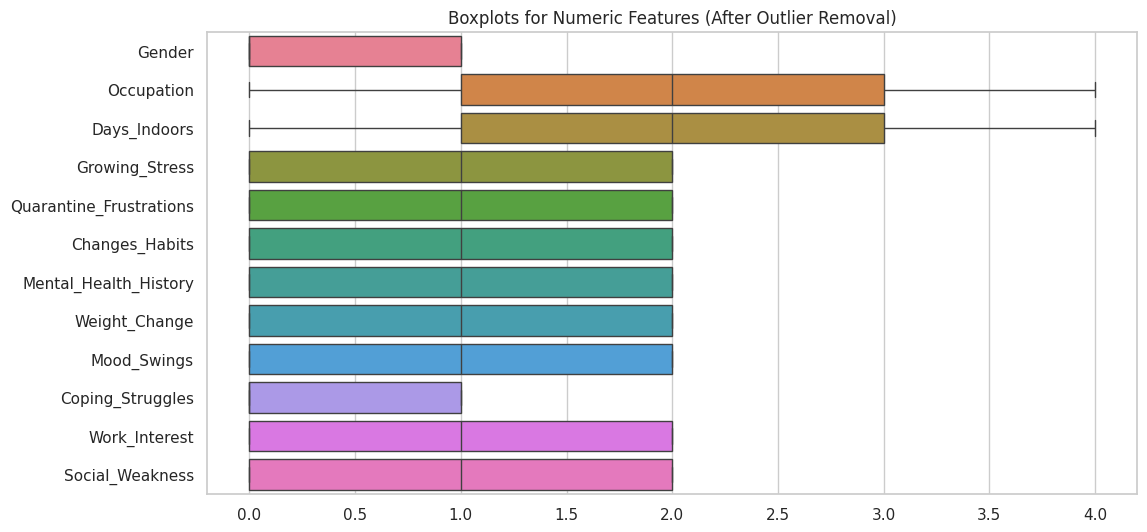

In [28]:
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
sns.boxplot(data=df_no_outliers.select_dtypes(include=['float64', 'int64']), orient="h")
plt.title("Boxplots for Numeric Features (After Outlier Removal)")
plt.show()

# Logistic regression

In [29]:
df.head()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,0,1,0,2,2,1,2,2,2,0,1,2
1,30-Above,1,3,2,2,2,0,1,1,0,0,1,2
2,30-Above,0,4,3,1,1,2,1,1,2,1,0,1
3,25-30,1,3,0,2,1,0,1,0,2,0,0,2
4,16-20,0,4,4,2,2,2,1,2,2,1,0,1


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df.drop(["Coping_Struggles","Age"], axis=1)
y = df["Coping_Struggles"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply L2 regularization to logistic regression
model = LogisticRegression(penalty='l2', solver='liblinear')  # 'liblinear' is a good choice for small datasets
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy:.2f}\n")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


Accuracy: 0.48

Confusion Matrix:
[[39 46]
 [39 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.46      0.48        85
           1       0.47      0.51      0.49        80

    accuracy                           0.48       165
   macro avg       0.49      0.49      0.48       165
weighted avg       0.49      0.48      0.48       165



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
X = df.drop(["Coping_Struggles","Age"], axis=1)
y = df["Coping_Struggles"]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with logistic regression
model = Pipeline([
    ('classifier', LogisticRegression())
])

# Fit the model
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.47878787878787876


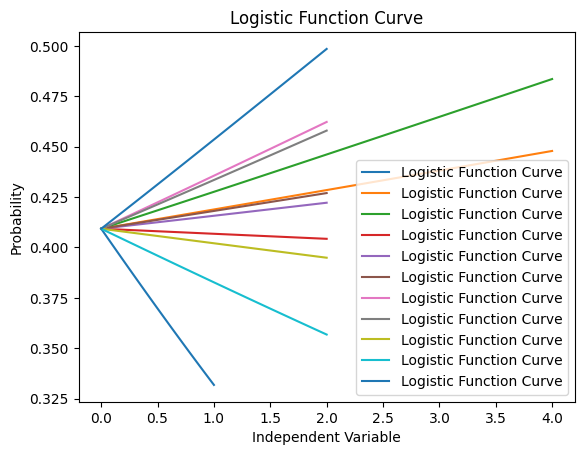

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Extract coefficients and intercept
coef = model.named_steps['classifier'].coef_[0]
intercept = model.named_steps['classifier'].intercept_

# Create a range of values for the independent variable
x_values = np.linspace(X.min(), X.max(), 100)

# Calculate the corresponding predicted probabilities using the logistic function
y_values = 1 / (1 + np.exp(-(coef * x_values + intercept)))

# Plot the logistic function curve
plt.plot(x_values, y_values, label='Logistic Function Curve')
plt.xlabel('Independent Variable')
plt.ylabel('Probability')
plt.title('Logistic Function Curve')
plt.show()

# SVM

Model Accuracy: 0.509090909090909
Precision: 0.49382716049382713
Recall: 0.5
F1 Score: 0.4968944099378882
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.52      0.52        85
           1       0.49      0.50      0.50        80

    accuracy                           0.51       165
   macro avg       0.51      0.51      0.51       165
weighted avg       0.51      0.51      0.51       165



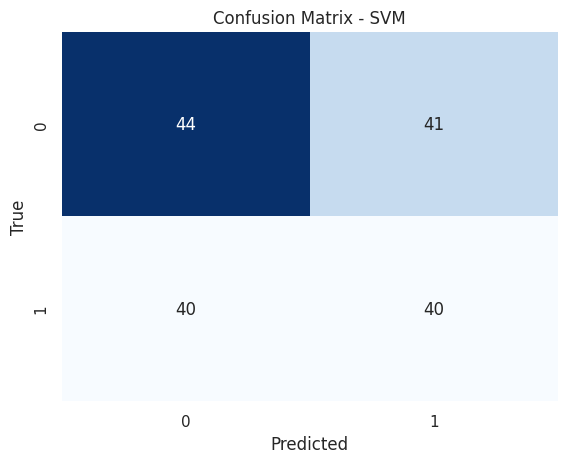

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


X = df.drop(["Coping_Struggles","Age"], axis=1)
y = df["Coping_Struggles"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with Support Vector Machines (SVM)
svm_model = Pipeline([
    ('classifier', SVC(kernel='linear'))  # You can choose different kernels (linear, rbf, etc.)
])

# Fit the SVM model
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM')
plt.show()

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Assuming your data is stored in a DataFrame called 'df'
X = df.drop(["Coping_Struggles","Age"], axis=1)
y = df["Coping_Struggles"]

# Create an SVM model
svm_model = SVC(kernel='linear')  # You can choose different kernels (linear, rbf, etc.)

# Perform cross-validation
cv_scores = cross_val_score(svm_model, X, y, cv=5)  # You can adjust the number of folds (cv) as needed

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean Accuracy:", cv_scores.mean())


Cross-Validation Scores: [0.53333333 0.53939394 0.49090909 0.46666667 0.5304878 ]
Mean Accuracy: 0.5121581670362158


# Naive bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your data is stored in a DataFrame called 'df'
X = df.drop(["Coping_Struggles","Age"], axis=1)
y = df["Coping_Struggles"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Naive Bayes model (Gaussian Naive Bayes for continuous features)
nb_model = GaussianNB()

# Fit the model
nb_model.fit(X_train, y_train)

# Predictions
y_pred = nb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.4909090909090909


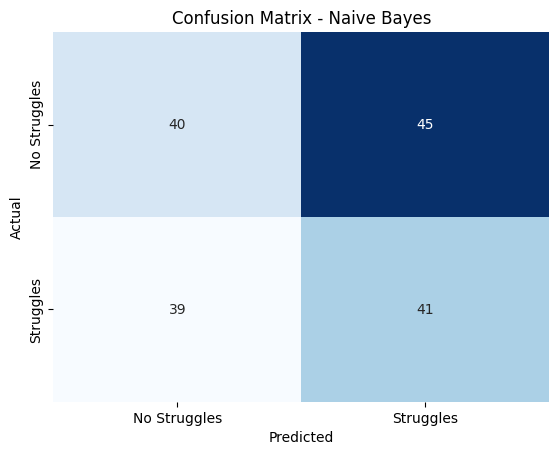

In [ ]:
# Confusion Matrix
class_names = ['No Struggles', 'Struggles']
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Naive Bayes')
plt.show()

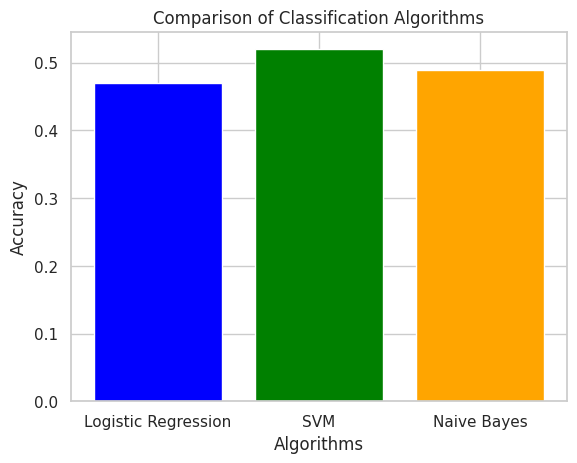

In [34]:
import matplotlib.pyplot as plt

algorithms = ['Logistic Regression', 'SVM', 'Naive Bayes']
accuracy_scores = [0.47, 0.52, 0.49]

#bar chart
plt.bar(algorithms, accuracy_scores, color=['blue', 'green', 'orange'])

plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Comparison of Classification Algorithms')
plt.show()
